In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

from src.utilities import *

In [2]:
df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Book-Ratings.csv')

In [3]:
df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
dist = distribution_table(df['Book-Rating'])
dist.shape

(11, 2)

In [5]:
dist

,index,Book-Rating
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


In [6]:
dist.rename(columns={'index':'Book-Rating', 'Book-Rating':'Count'},inplace=True)

In [7]:
dist

,Book-Rating,Count
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


In [8]:
dist.sort_values(by='Book-Rating', inplace=True)

In [9]:
dist

,Book-Rating,Count
0,0,716109
10,1,1770
9,2,2759
8,3,5996
7,4,8904
5,5,50974
6,6,36924
3,7,76457
1,8,103736
4,9,67541


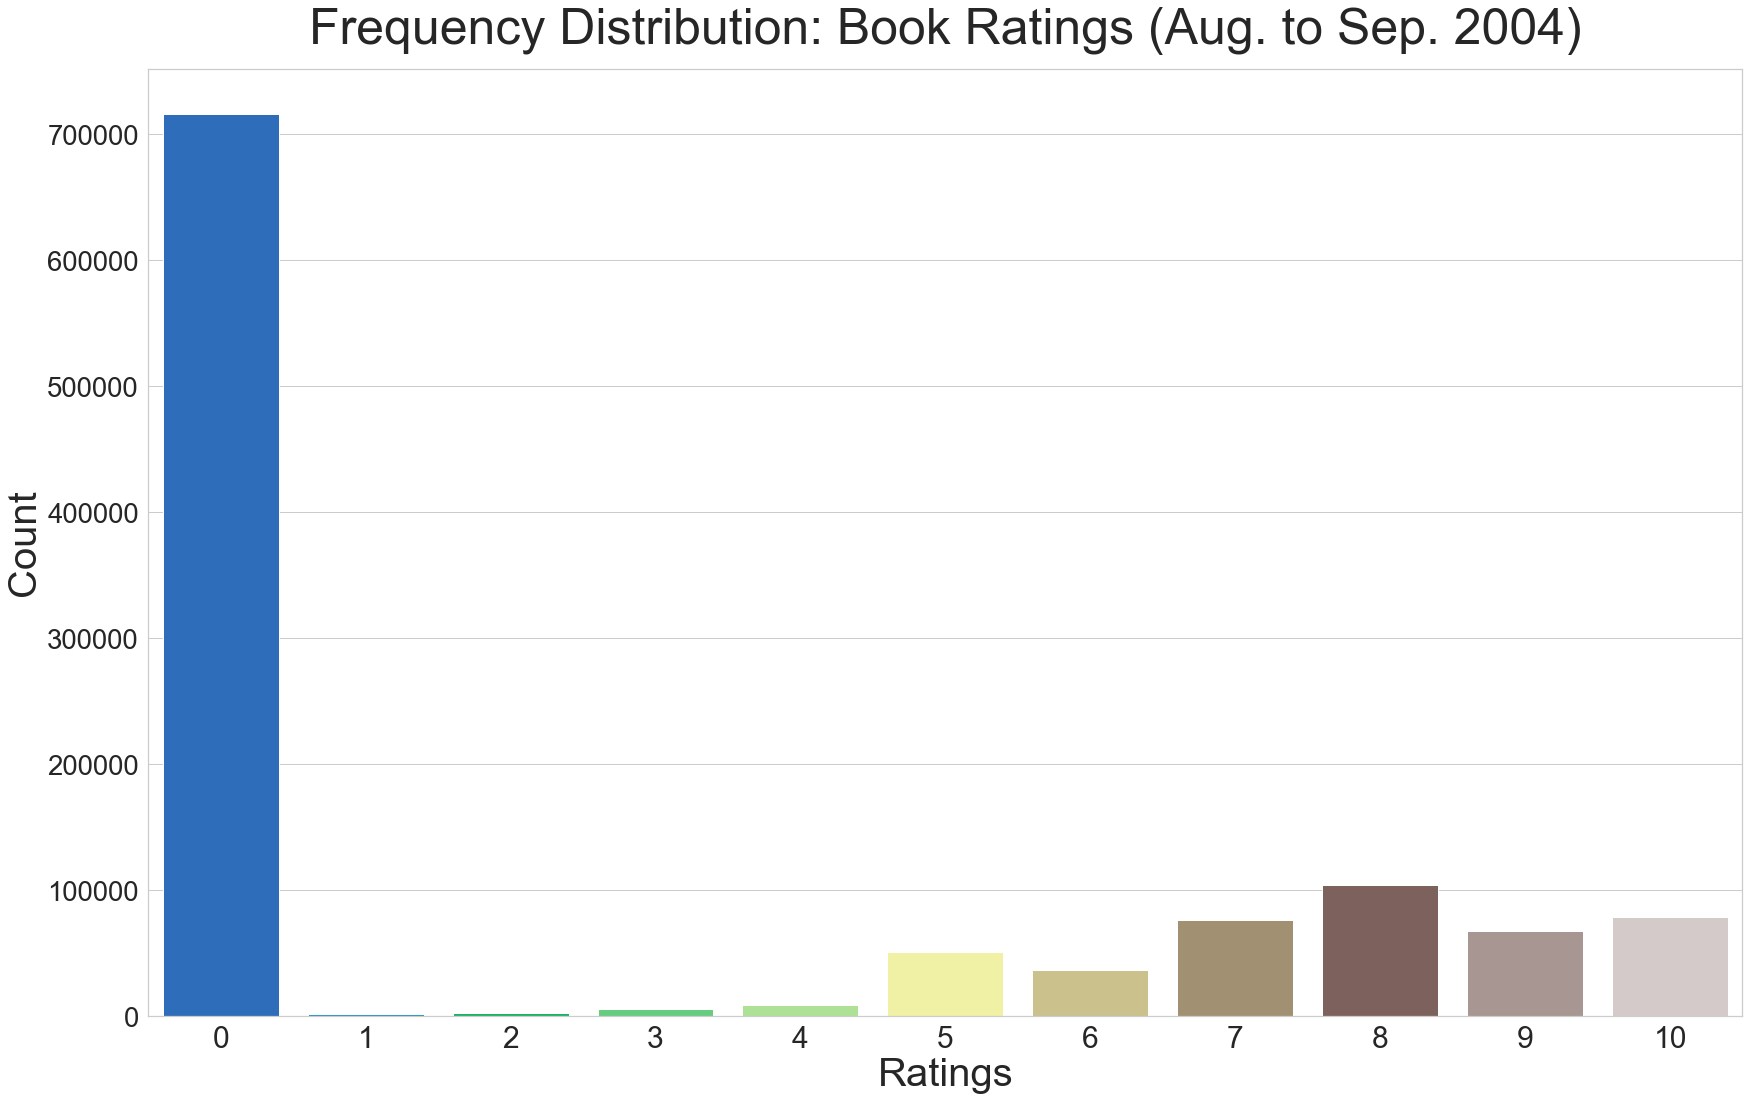

In [10]:
plot_distribution(dist, 
                  'Book-Rating', 
                  'Count', 
                  'Ratings', 
                  'Count', 
                  'Frequency Distribution: Book Ratings (Aug. to Sep. 2004)')

In [11]:
palette()


    Possible values are: 

    palette = ........ 

    Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, 
    BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, 
    GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, 
    OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
    Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, 
    PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, 
    Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, 
    RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, 
    Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, 
    Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, 
    YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
    binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, 
    cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
    cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, 
    gist_gray_r, gist_heat, gist_hea

# Books

In [12]:
books = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Books.csv')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.p

In [13]:
books.shape

(271360, 8)

In [14]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [15]:
books['Year-Of-Publication'].value_counts()

2002         13903
2001         13715
1999         13414
2000         13373
1998         12116
             ...  
1944             1
1897             1
1934             1
Gallimard        1
2011             1
Name: Year-Of-Publication, Length: 202, dtype: int64

In [16]:
books.ISBN.value_counts()

0451210271    1
0743451406    1
0671572806    1
0872863271    1
0140070427    1
             ..
0571199488    1
1566091594    1
0452283302    1
0307116689    1
2869305699    1
Name: ISBN, Length: 271360, dtype: int64

In [17]:
books['Book-Title'].value_counts()

Selected Poems                                                                                                                                   27
Little Women                                                                                                                                     24
Wuthering Heights                                                                                                                                21
Dracula                                                                                                                                          20
The Secret Garden                                                                                                                                20
                                                                                                                                                 ..
Always a Princess                                                                                               

In [18]:
books['Book-Author'].value_counts()

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
                      ... 
Ulrich Hamm              1
Jeanne Besser            1
Mark  Weber              1
Jerolyn Ann Nentl        1
FRANK CAPLAN             1
Name: Book-Author, Length: 102023, dtype: int64

In [19]:
books['Year-Of-Publication'].value_counts()

2002         13903
2001         13715
1999         13414
2000         13373
1998         12116
             ...  
1944             1
1897             1
1934             1
Gallimard        1
2011             1
Name: Year-Of-Publication, Length: 202, dtype: int64

In [20]:
books['Publisher'].value_counts()

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Phat Books Publishing         1
Insight Publishing (CO)       1
Wancol Publications           1
Regenbogen-Verlag             1
Thorsons Pub                  1
Name: Publisher, Length: 16807, dtype: int64

In [21]:
books['Publisher'].value_counts().head(30)

Harlequin                             7535
Silhouette                            4220
Pocket                                3905
Ballantine Books                      3783
Bantam Books                          3646
Scholastic                            3160
Simon &amp; Schuster                  2971
Penguin Books                         2844
Berkley Publishing Group              2771
Warner Books                          2727
Penguin USA                           2717
Harpercollins                         2525
Fawcett Books                         2258
Signet Book                           2070
Random House Inc                      2045
St Martins Pr                         1953
St. Martin's Press                    1783
Tor Books                             1704
HarperCollins Publishers              1700
Zebra Books                           1694
Bantam                                1660
Avon                                  1566
Jove Books                            1553
Vintage Boo

# Users

In [22]:
users = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Users.csv')

In [92]:
test_users = users.copy()

In [93]:
test_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [94]:
test_users.Age.isna().sum()

110762

In [95]:
test_users.shape

(278858, 3)

In [96]:
(110762/278858) * 100

39.71985741847105

## Extracting Countries for Plotting Map and Bar Graph

In [97]:
test_users['Location'] = test_users.Location.apply(lambda x: x.strip())

In [98]:
test_users.Location.head()

0                    nyc, new york, usa
1             stockton, california, usa
2       moscow, yukon territory, russia
3             porto, v.n.gaia, portugal
4    farnborough, hants, united kingdom
Name: Location, dtype: object

In [99]:
test_users['Location'] = test_users.Location.str.split(',')

In [100]:
users_df = test_users.copy()

In [101]:
users_df['country'] = [location[-1] for location in users_df.Location ]

In [102]:
users_df['country'] = users_df.country.apply(lambda x: x.strip())

In [103]:
users_df.shape

(278858, 4)

In [104]:
users_df = users_df[users_df['country'] != '']

In [105]:
users_df.shape

(274280, 4)

In [109]:
users_df['country'] = users_df['country'].str.replace('spain"', 'spain')

In [117]:
dist_country = distribution_table(users_df['country'])

In [119]:
dist_country.rename(columns={'index':'country', 'country':'count'}, inplace=True)

In [121]:
users_df['country'] = users_df['country'].str.replace('portugal"', 'portugal')
dist_country['country'] = dist_country['country'].str.replace('portugal"', 'portugal')

In [123]:
dist_country.shape

(707, 2)

In [140]:
users_df['country'] = users_df['country'].str.replace('españa', 'spain')
dist_country['country'] = dist_country['country'].str.replace('españa', 'spain')

In [143]:
users_df['country'] = users_df['country'].str.replace('france"', 'france')
dist_country['country'] = dist_country['country'].str.replace('france"', 'france')

In [144]:
users_df['country'] = users_df['country'].str.replace('la france', 'france')
dist_country['country'] = dist_country['country'].str.replace('la france', 'france')

In [ ]:
users_df['country'] = users_df['country'].str.replace('la france', 'france')
dist_country['country'] = dist_country['country'].str.replace('la france', 'france')

In [148]:
for country in dist_country['country']:
    if '"' in country:
        dist_country['country'].str.replace('"', '')

In [152]:
dist_country['country'] = dist_country['country'].str.replace('"', ' ')

In [155]:
dist_country['country'] = dist_country['country'].apply(lambda x: x.strip())

In [158]:
users_df['country'] = users_df['country'].apply(lambda x: x.strip())

In [159]:
dist_country['country'] = dist_country['country'].str.replace('l`italia', 'italy')

In [162]:
dist_country['country'] = dist_country['country'].str.replace('urugua', 'uruguay')

In [350]:
dist_country.shape

(707, 2)

In [216]:
top20_countries = dist_country.head(20)

In [217]:
top20_countries.head()

,country,count
0,usa,139711
1,canada,21658
2,united kingdom,18538
3,germany,17043
4,spain,13258


In [311]:
type(top20_countries['count'][9])

numpy.int64

In [351]:
def plot_horizontal_distribution(x_val, y_val, df, title, color, xlim, xlabel):
    '''
    Rename columns appropriately
    prior to plotting distribution.
    '''
    sns.set(style='whitegrid',
        palette='CMRmap',
        font_scale=2.5, 
        color_codes=True)
    sns.set_color_codes('pastel')
    g = sns.barplot(x = x_val, y = y_val, data=df, label=title, color=color)
    ax.set_title(title,
                fontsize=40,
                pad=15.0)
    sns.despine(top=True, left=False, bottom=True, right=True)
    plt.xticks(rotation=45)
    for p in ax.patches:
        width=p.get_width()
        plt.text(5 + p.get_width(), p.get_y() + 0.55 * p.get_height(), '{:.0f}'.format(int(width)), va='center')
    plt.tight_layout()
    plt.savefig('img/new_horizontal_bar_graph.jpg');

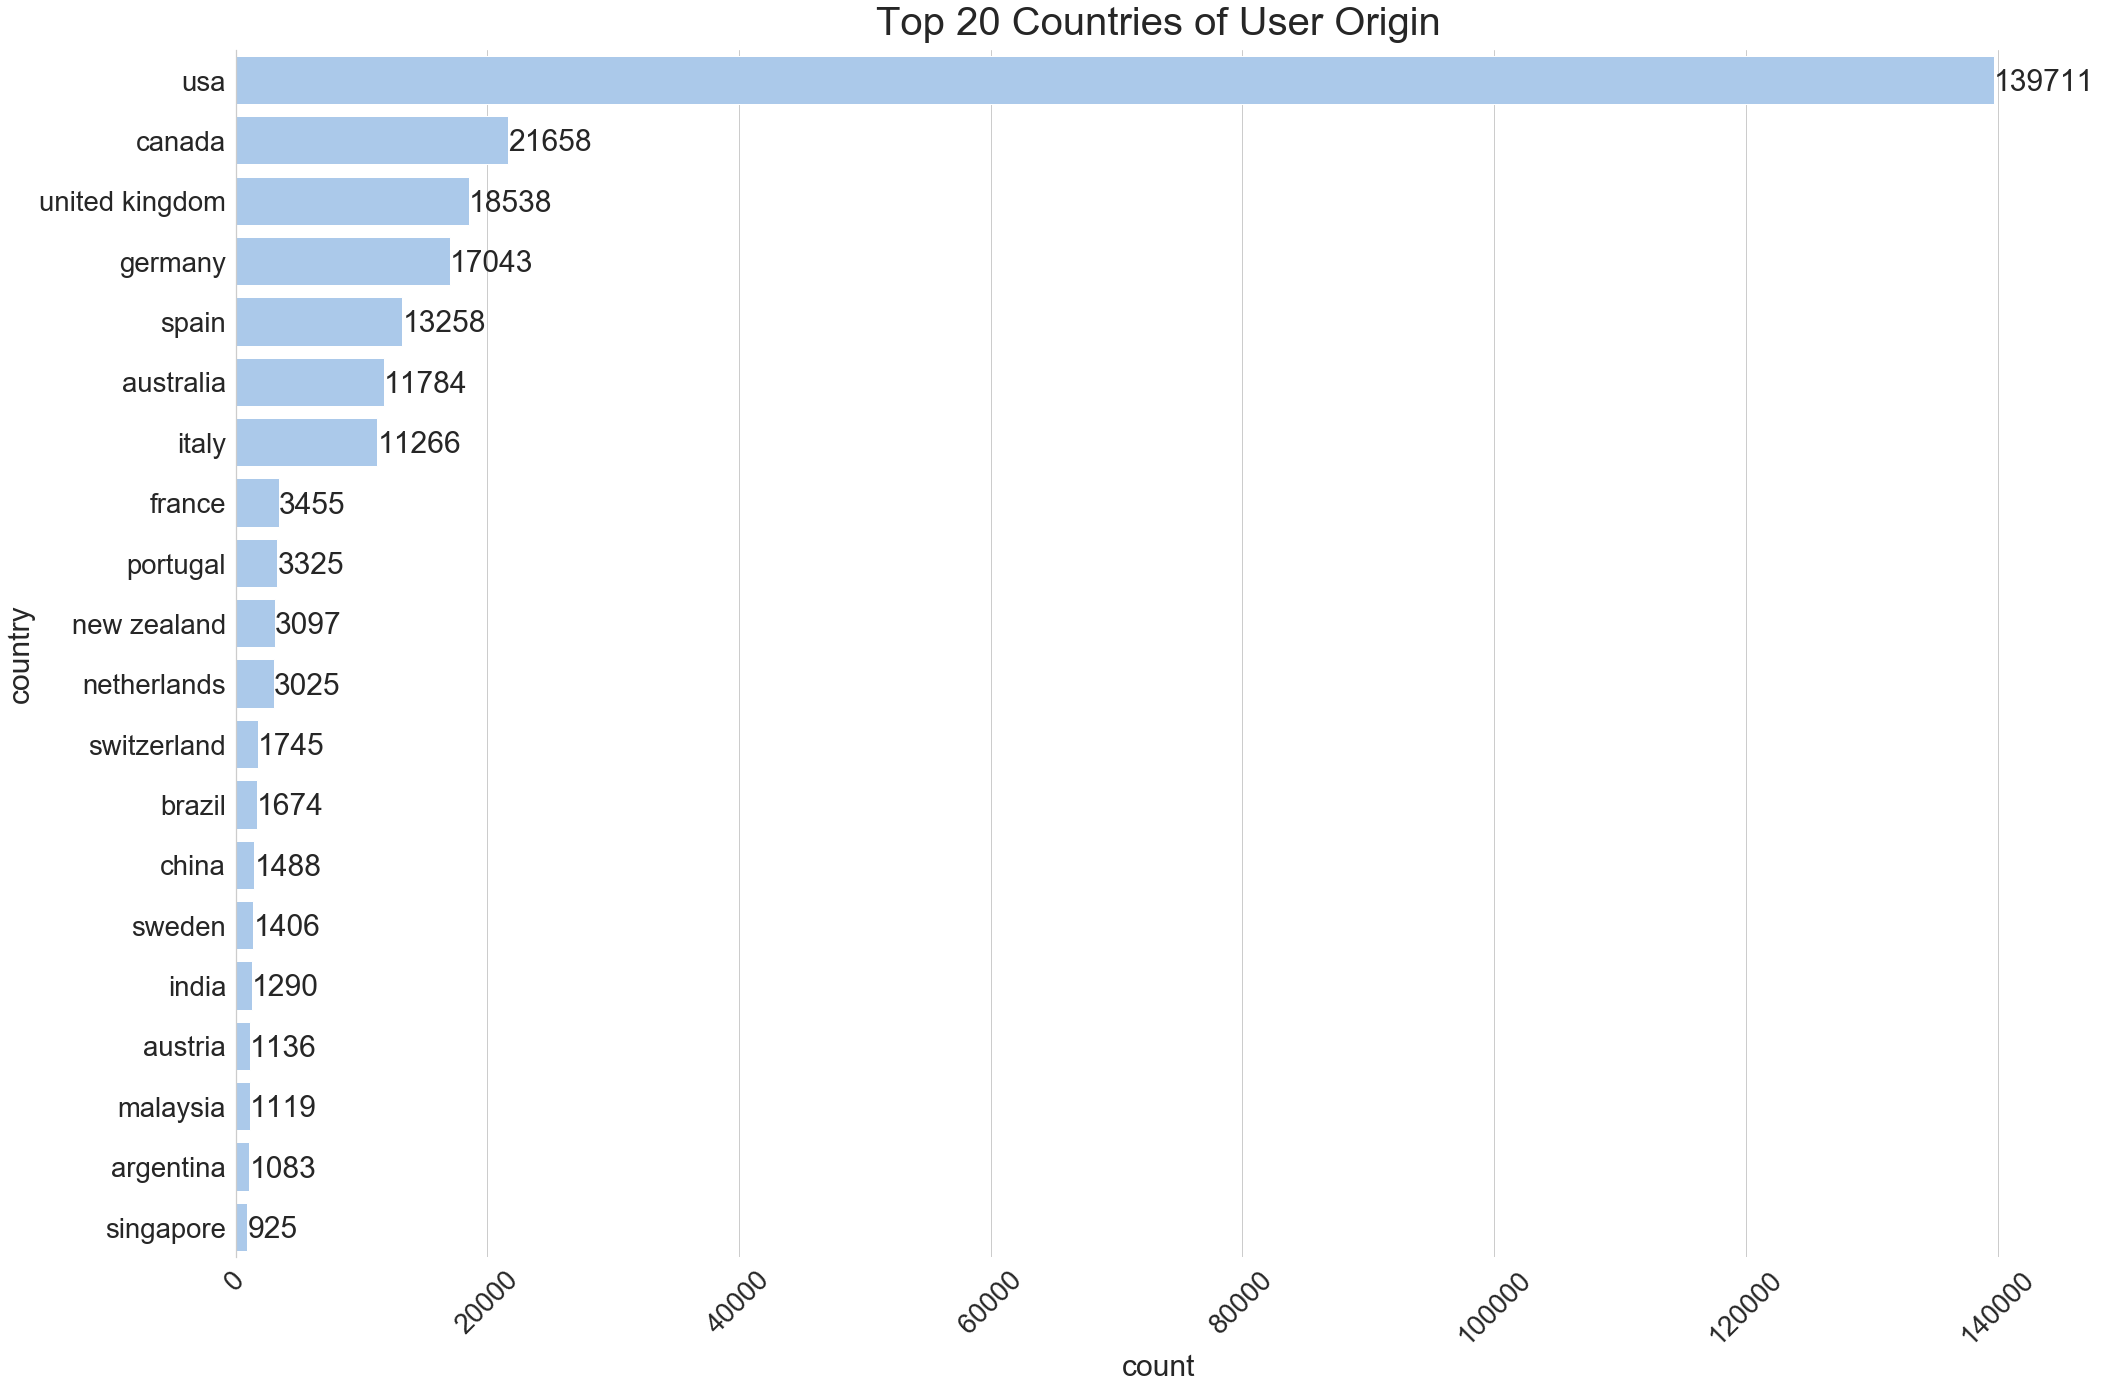

In [352]:
fig, ax = plt.subplots(figsize=(30,20))
plot_horizontal_distribution('count', 'country', 
                             top20_countries, 
                             'Top 20 Countries of User Origin', 
                             'b',
                             (0, 140000),
                             'User Count')